# 🌟 **DiDi Business Intelligence Challenge** 🌟

### 📝Step 1: Load the CSV Files with Pandas
- First, we load the datasets into Pandas DataFrames to be able to visualize and work with them. We have three CSV files: - 📁 restaurants_visitors.csv, - 📁 date_info.csv, and - 📁 store_info.csv.

In [2]:
import pandas as pd

# Cargar los datos de los archivos CSV
restaurants_visitors_df = pd.read_csv('restaurants_visitors.csv')
date_info_df = pd.read_csv('date_info.csv')
store_info_df = pd.read_csv('store_info.csv')

# Verificar las primeras filas de cada dataframe
print(restaurants_visitors_df.head())
print(date_info_df.head())
print(store_info_df.head())


                 id  visit_date    visit_datetime  reserve_datetime  \
0  db80363d35f10926  2016-01-01  01/01/2016 00:00  01/01/2016 01:00   
1  db80363d35f10926  2016-01-02  02/01/2016 01:00  01/01/2016 16:00   
2  db80363d35f10926  2016-01-02  02/01/2016 01:00  01/01/2016 15:00   
3  db80363d35f10926  2016-01-02  02/01/2016 18:00  02/01/2016 14:00   
4  db80363d35f10926  2016-01-02  02/01/2016 18:00  02/01/2016 02:00   

   reserve_visitors  
0                 5  
1                 2  
2                 4  
3                 2  
4                 3  
  calendar_date day_of_week  holiday_flg
0    2016-01-01      Friday            1
1    2016-01-02    Saturday            1
2    2016-01-03      Sunday            1
3    2016-01-04      Monday            0
4    2016-01-05     Tuesday            0
           store_id      genre_name                     area_name   latitude  \
0  0f0cdeee6c9bf3d7  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri  34.695124   
1  7cc17a324ae5c7dc  Italian/French

- This code loads the data from the CSV files into three Pandas DataFrames: - 📁 restaurants_visitors_df, - 📁 date_info_df, and - 📁 store_info_df. 
- We then display the first few rows of each DataFrame to verify that they have been loaded correctly.

### 📝Step 2: Connect Pandas to SQLite
- Next, we create an in-memory SQLite database using Pandas and load the DataFrames into it as tables.
- This block of code establishes a connection to an in-memory SQLite database, and then loads the three Pandas DataFrames as tables within the database.

In [3]:
import sqlite3

# Conectar a una base de datos SQLite en memoria
conn = sqlite3.connect(':memory:')

# Cargar los dataframes en SQLite como tablas
restaurants_visitors_df.to_sql('restaurants_visitors', conn, index=False, if_exists='replace')
date_info_df.to_sql('date_info', conn, index=False, if_exists='replace')
store_info_df.to_sql('store_info', conn, index=False, if_exists='replace')


829

### 📝Step 3: SQL Queries with Pandas
We can now perform SQL queries directly on this in-memory SQLite database using Pandas.

# 🌟 **Challengue 1** 🌟
Write the SQL queries necessary to generate a list of the five restaurants that have the highest average number of visitors on holidays. The result table should also contain that average per restaurant.

In [4]:
query = '''
    SELECT rv.id, AVG(rv.reserve_visitors) as avg_visitors
    FROM restaurants_visitors rv
    JOIN date_info di ON rv.visit_date = di.calendar_date
    WHERE di.holiday_flg = 1
    GROUP BY rv.id
    ORDER BY avg_visitors DESC
    LIMIT 5;
'''

# Ejecutar la consulta
top_restaurants = pd.read_sql_query(query, conn)
print(top_restaurants)


                 id  avg_visitors
0  db80363d35f10926      7.275000
1  bb09595bab7d5cfb      5.833333
2  e053c561f32acc28      5.240000
3  24b9b2a020826ede      4.333333
4  42c9aa6d617c5057      4.228571


# Explanation:
 - Joining the Tables: Similar to the previous query, we join the restaurants_visitors table with date_info to associate visits with the day of the week.
 - Grouping by Day of the Week: We group the results by day_of_week from the date_info table, allowing us to calculate the average number of visitors for each day.
 - Calculating Average Visitors per Day: We use AVG(rv.reserve_visitors) to find the average number of visitors per day.
 - Sorting and Limiting: We order the results by average visitors in descending order and limit the output to the day with the highest average (LIMIT 1).

# 🌟 **Challengue 2** 🌟
- Use SQL to discover which day of the week there are usually more visitors on average in restaurants.

### 📝Step 4: Finding the Day of the Week with the Highest Average Visitors
- Now let’s solve point 2, which asks for the day of the week that generally has the most visitors on average.

In [5]:
# Revisar los datos de los archivos
print(restaurants_visitors_df.head())
print(date_info_df.head())


                 id  visit_date    visit_datetime  reserve_datetime  \
0  db80363d35f10926  2016-01-01  01/01/2016 00:00  01/01/2016 01:00   
1  db80363d35f10926  2016-01-02  02/01/2016 01:00  01/01/2016 16:00   
2  db80363d35f10926  2016-01-02  02/01/2016 01:00  01/01/2016 15:00   
3  db80363d35f10926  2016-01-02  02/01/2016 18:00  02/01/2016 14:00   
4  db80363d35f10926  2016-01-02  02/01/2016 18:00  02/01/2016 02:00   

   reserve_visitors  
0                 5  
1                 2  
2                 4  
3                 2  
4                 3  
  calendar_date day_of_week  holiday_flg
0    2016-01-01      Friday            1
1    2016-01-02    Saturday            1
2    2016-01-03      Sunday            1
3    2016-01-04      Monday            0
4    2016-01-05     Tuesday            0


In [6]:
# Consulta SQL para obtener los cinco restaurantes con mayor promedio de visitantes en días festivos
query = '''
    SELECT rv.id, AVG(rv.reserve_visitors) as avg_visitors
    FROM restaurants_visitors rv
    JOIN date_info di ON rv.visit_date = di.calendar_date
    WHERE di.holiday_flg = 1
    GROUP BY rv.id
    ORDER BY avg_visitors DESC
    LIMIT 5;
'''

# Ejecutar la consulta
top_restaurants = pd.read_sql_query(query, conn)

# Mostrar los resultados
top_restaurants


,id,avg_visitors
0,db80363d35f10926,7.275000
1,bb09595bab7d5cfb,5.833333
2,e053c561f32acc28,5.240000
3,24b9b2a020826ede,4.333333
4,42c9aa6d617c5057,4.228571


In [7]:
# Consulta SQL para obtener el día de la semana con más visitantes en promedio
query = '''
    SELECT di.day_of_week, AVG(rv.reserve_visitors) as avg_visitors
    FROM restaurants_visitors rv
    JOIN date_info di ON rv.visit_date = di.calendar_date
    GROUP BY di.day_of_week
    ORDER BY avg_visitors DESC
    LIMIT 1;
'''

# Ejecutar la consulta
busiest_day = pd.read_sql_query(query, conn)

# Mostrar los resultados
busiest_day


,day_of_week,avg_visitors
0,Friday,4.454754


# Explanation:
 - Joining the Tables: Similar to the previous query, we join the restaurants_visitors table with date_info to associate visits with the day of the week.
 - Grouping by Day of the Week: We group the results by day_of_week from the date_info table, allowing us to calculate the average number of visitors for each day.
 - Calculating Average Visitors per Day: We use AVG(rv.reserve_visitors) to find the average number of visitors per day.
 - Sorting and Limiting: We order the results by average visitors in descending order and limit the output to the day with the highest average (LIMIT 1).

# 🌟 **Challengue 3** 🌟
How was the percentage of growth of the amount of visitors week over week for the last four weeks of the data? Use SQL too.

### 📝Step 5: Calculating Week-over-Week Growth in Visitor Numbers (Last Four Weeks)
For point 3, we need to calculate the week-over-week growth of restaurant visitors for the last four weeks of the data.

In [8]:
# Agregar una columna para extraer la semana del año de la columna visit_date
query = '''
    WITH weekly_visitors AS (
        SELECT STRFTIME('%Y-%W', rv.visit_date) AS week_of_year, 
               SUM(rv.reserve_visitors) AS total_visitors
        FROM restaurants_visitors rv
        GROUP BY week_of_year
        ORDER BY week_of_year DESC
        LIMIT 4
    )
    SELECT week_of_year, 
           total_visitors, 
           LAG(total_visitors) OVER (ORDER BY week_of_year) AS prev_week_visitors,
           ((total_visitors - LAG(total_visitors) OVER (ORDER BY week_of_year)) * 100.0 / LAG(total_visitors) OVER (ORDER BY week_of_year)) AS growth_percentage
    FROM weekly_visitors;
'''

# Ejecutar la consulta
weekly_growth = pd.read_sql_query(query, conn)

# Mostrar los resultados
weekly_growth


,week_of_year,total_visitors,prev_week_visitors,growth_percentage
0,2017-19,170,NaN,NaN
1,2017-20,78,170.0,-54.117647
2,2017-21,63,78.0,-19.230769
3,2017-22,11,63.0,-82.539683


# Explanation:
 - Extracting the Week from the Date: We use STRFTIME('%Y-%W', rv.visit_date) to extract the week of the year from the visit_date, allowing us to group the data by week.
 - Summing Visitors by Week: We use SUM(rv.reserve_visitors) to calculate the total number of visitors for each week.
 - Calculating Week-over-Week Growth: Using the LAG() function, we access the total number of visitors from the previous week and calculate the percentage growth.
 - Ordering and Limiting Results: We limit the query to the last four weeks of data and order the results chronologically.

In [11]:
# Revisar los valores únicos de la columna visit_date
unique_dates = restaurants_visitors_df['visit_date'].unique()
print(unique_dates)


['2016-01-01' '2016-01-02' '2016-01-03' '2016-01-04' '2016-01-06'
 '2016-01-07' '2016-01-08' '2016-01-09' '2016-01-10' '2016-01-11'
 '2016-01-12' '2016-01-13' '2016-01-14' '2016-01-15' '2016-01-16'
 '2016-01-17' '2016-01-18' '2016-01-19' '2016-01-20' '2016-01-21'
 '2016-01-22' '2016-01-23' '2016-01-24' '2016-01-25' '2016-01-26'
 '2016-01-27' '2016-01-28' '2016-01-29' '2016-01-30' '2016-01-31'
 '2016-02-01' '2016-02-03' '2016-02-04' '2016-02-05' '2016-02-06'
 '2016-02-07' '2016-02-08' '2016-02-09' '2016-02-10' '2016-02-11'
 '2016-02-12' '2016-02-13' '2016-02-14' '2016-02-15' '2016-02-16'
 '2016-02-17' '2016-02-18' '2016-02-19' '2016-02-20' '2016-02-21'
 '2016-02-22' '2016-02-23' '2016-02-24' '2016-02-25' '2016-02-26'
 '2016-02-27' '2016-02-28' '2016-02-29' '2016-03-02' '2016-03-03'
 '2016-03-04' '2016-03-05' '2016-03-06' '2016-03-07' '2016-03-08'
 '2016-03-09' '2016-03-10' '2016-03-11' '2016-03-12' '2016-03-13'
 '2016-03-14' '2016-03-15' '2016-03-16' '2016-03-17' '2016-03-18'
 '2016-03-

In [12]:
# Intentar convertir las fechas, ignorando los errores
restaurants_visitors_df['visit_date'] = pd.to_datetime(restaurants_visitors_df['visit_date'], errors='coerce')

# Revisar las filas con valores NaT (errores en la conversión)
invalid_dates = restaurants_visitors_df[restaurants_visitors_df['visit_date'].isna()]
print(invalid_dates)


                    id visit_date    visit_datetime  reserve_datetime  \
1567  965b2e0cf4119003        NaT  26/10/2016 20:00  25/10/2016 17:00   
1568  42c9aa6d617c5057        NaT  27/10/2016 11:00  26/10/2016 13:00   
1569  45326ebb8dc72cfb        NaT  27/10/2016 11:00  26/10/2016 21:00   
1570  45326ebb8dc72cfb        NaT  27/10/2016 11:00  26/10/2016 21:00   
1571  0a74a5408a0b8642        NaT  27/10/2016 17:00  27/10/2016 14:00   
...                ...        ...               ...               ...   
5448  324f7c39a8410e7c        NaT  31/12/2016 20:00  29/12/2016 19:00   
5449  324f7c39a8410e7c        NaT  31/12/2016 20:00  27/11/2016 18:00   
5450  324f7c39a8410e7c        NaT  31/12/2016 20:00  30/12/2016 18:00   
5451  db80363d35f10926        NaT  31/12/2016 21:00  09/12/2016 20:00   
5452  db80363d35f10926        NaT  31/12/2016 23:00  28/12/2016 10:00   

      reserve_visitors  
1567                 5  
1568                 5  
1569                 1  
1570                 1 

In [13]:
# Eliminar las filas con fechas no válidas
restaurants_visitors_df = restaurants_visitors_df.dropna(subset=['visit_date'])


# 🌟 **Challengue 4** 🌟
 Forecast for the next six months, after the last date of the data, the sum of visitors of all the restaurants and validate the accuracy of your forecast. You can solve this question using the tool that you prefer.

### 📝 Step 6: Forecasting Visitor Numbers for the Next Six Months
 For point 4, we need to forecast the total number of restaurant visitors for the next six months based on the historical data.

### 📝 Step 6.1: Data Preparation
 First, we need to ensure that the date column is in the correct format and then group the data by date to get the total visitors per day.

In [14]:
# Importar las librerías necesarias
import pandas as pd
from statsmodels.tsa.api import SimpleExpSmoothing
import matplotlib.pyplot as plt

# Asegurarnos de que la columna 'visit_date' esté en formato de fecha
restaurants_visitors_df['visit_date'] = pd.to_datetime(restaurants_visitors_df['visit_date'])

# Agrupar por fecha para obtener el total de visitantes por día
daily_visitors = restaurants_visitors_df.groupby('visit_date')['reserve_visitors'].sum().reset_index()

# Mostrar las primeras filas
daily_visitors.head()


,visit_date,reserve_visitors
0,2016-01-01,5
1,2016-01-02,34
2,2016-01-03,17
3,2016-01-04,7
4,2016-01-06,19


# Explanation:
 - Grouping by Date: We group the visitor data by visit_date to get the total number of visitors for each day.
 - Exponential Smoothing Model: We use SimpleExpSmoothing from statsmodels to create a forecast based on the historical data.
 - Forecasting for Six Months: We forecast the number of visitors for the next 180 days (approximately six months).
 - Visualization: We plot both the historical data and the forecast to visualize the projected trend.

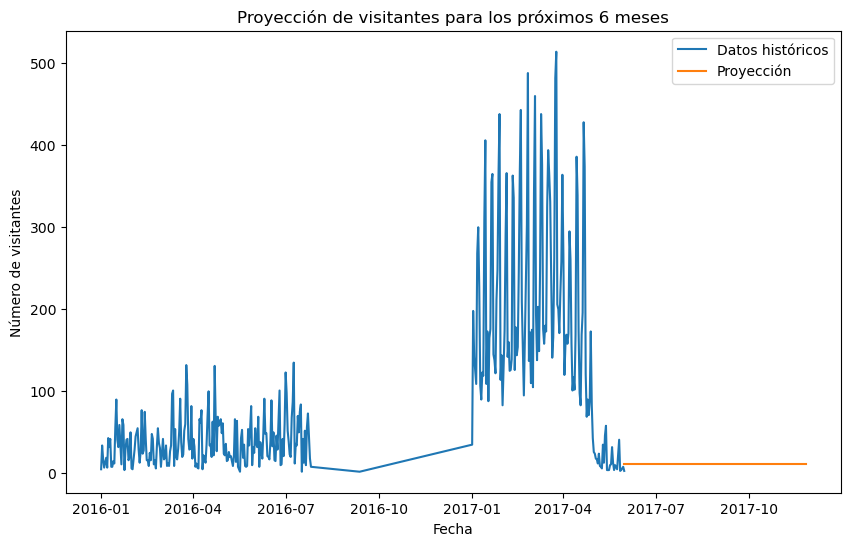

In [15]:
from statsmodels.tsa.api import SimpleExpSmoothing

# Usar suavizamiento exponencial simple para hacer la proyección
model = SimpleExpSmoothing(daily_visitors['reserve_visitors']).fit()

# Hacer la proyección para los próximos 180 días (aproximadamente 6 meses)
forecast = model.forecast(180)

# Crear un dataframe con las fechas proyectadas
forecast_dates = pd.date_range(start=daily_visitors['visit_date'].max(), periods=180, freq='D')
forecast_df = pd.DataFrame({'forecast_date': forecast_dates, 'forecast_visitors': forecast})

# Graficar la serie de tiempo original y la proyección
plt.figure(figsize=(10, 6))
plt.plot(daily_visitors['visit_date'], daily_visitors['reserve_visitors'], label='Datos históricos')
plt.plot(forecast_df['forecast_date'], forecast_df['forecast_visitors'], label='Proyección')
plt.title('Proyección de visitantes para los próximos 6 meses')
plt.xlabel('Fecha')
plt.ylabel('Número de visitantes')
plt.legend()
plt.show()


# 🌟 **Challengue 5** 🌟
 Based on the data and your ideas, plan strategies to double the total restaurant visitors in six months.

1.  Dynamic Offers on Holidays and Weekends
- Data shows that holidays and weekends have higher visitor traffic. We could implement a dynamic pricing system or promotions on these days to attract even more people. Example: "Happy Hour" offers or 20% discounts for advance reservations on high-demand days.

 Dynamic Offers on Holidays and Weekends
- KPIs: Average visitors on weekends/holidays, conversion rate of promotions, revenue growth.
- Pre-Strategy Baseline: Calculate the current average number of visitors on weekends and holidays from the historical data.
- Post-Strategy Impact: Track the increase in visitors and compare it with the baseline. Use metrics like percentage increase in visitors, and track the conversion rate of specific offers.

2. Personalization Based on Restaurant Type
- Using the genre_name column, we can create targeted campaigns for each type of restaurant. For example, fast-food restaurants could offer family combos on weekends, while gourmet restaurants   could host exclusive experiences with guest chefs or special menus on holidays.

 Personalization Based on Restaurant Type
- KPIs: Visitor growth per restaurant genre, customer satisfaction, average spend per customer.
- Pre-Strategy Baseline: Calculate the average number of visitors per restaurant type (from genre_name) and their average spend.
- Post-Strategy Impact: Measure the change in visitor count and average spend after personalized promotions are launched. Compare the impact across different genres to understand which types benefit the most from personalization.

3.  Geolocated Campaigns with Local Collaborations
- Leveraging the area_name data, we could launch geolocated campaigns in collaboration with local events or nearby attractions. Cross-promotions, like restaurant discounts for attending a nearby sports or cultural event, could significantly increase visitor flow.

- These three strategies aim to maximize the impact of high-potential days while leveraging the diversity of restaurant types and geographic areas.

 Geolocated Campaigns with Local Collaborations
- KPIs: Visitor growth in targeted areas, collaboration-driven foot traffic, offer redemption rate.
- Pre-Strategy Baseline: Use the area_name data to determine the current average number of visitors in restaurants within a given location.
- Post-Strategy Impact: Measure visitor increase in restaurants located near events or attractions. Track the success rate of collaborative offers, like the number of people who redeemed discounts for attending nearby events.

 Control Group Analysis
- Control Groups: To accurately measure the effectiveness, maintain control groups where the strategies are not applied. Compare the results in terms of visitor growth and revenue between restaurants that received the new strategies and those that didn't.

 Time Series Analysis
- Time Series: Conduct a time series analysis before and after the strategies are implemented to visualize visitor trends and forecast potential future impacts.

# 🌟 **Challengue 6** 🌟
 Imagine that these restaurants are in your city (and not in Japan), what other data would you want to join in order of get more insights to increase the visitors?

1.  Traffic and Weather Data
- Incorporating real-time traffic and weather data would enable promotions based on external conditions. For example, during bad weather, offer discounted delivery services. If traffic is low in certain areas, launch flash deals to attract more visitors. Impact: Adjust strategies in real-time based on current external factors.

2.  Social Media and Review Data
- Integrating data from platforms like Google Reviews, TripAdvisor, or social media would allow us to correlate customer sentiment with visits. If we detect a positive trend in reviews, we could amplify marketing campaigns. Impact: Use customer feedback to personalize experiences and create targeted promotions.

3.  Demographic and Customer Segmentation Data
- Including demographic data (age, income, occupation) from different areas would allow for more precise campaign targeting. For instance, restaurants in areas with a younger population could partner with local events or festivals. Impact: Segment offers based on the profile of potential customers, increasing relevance.

These three additional data sources (traffic, weather, social media, and demographics) would provide a smarter and more personalized approach to attracting visitors and optimizing restaurant operations.

# 🌟 **Challengue 7** 🌟
 How many channels can you think of downloading a DiDi Rides APP and how will you estimate the quality and cost of each channel?

1.  Social Media Advertising (Facebook, Instagram)
- This is a popular channel to reach large audiences. We can measure the cost per install (CPI) and target audiences based on interests or location.
Cost: Medium
Quality: High, since it allows precise targeting and personalized ads.

2.  Google Ads Campaigns
- Ads on Google (search and YouTube) can attract users interested in mobility solutions. CPI tends to be low, but quality can vary depending on keyword relevance.
Cost: Low to medium
Quality: Medium, depending on the user’s search intent.

3.  User Referrals (Referral Program)
- Offering incentives to current users for referring new users is an effective way to drive downloads. This channel can generate more engaged users since they come via recommendation.
Cost: Low (incentive for referral)
Quality: High, due to the personal recommendation from a known person.

4.  Television Advertising
- Though it comes with a high cost, television advertising allows you to reach massive audiences and generate significant brand visibility in a short amount of time. This channel can be particularly effective during product launches or national campaigns. Despite the high cost, the impact on brand awareness is considerable, although the CPI (Cost per Install) is typically much higher compared to digital channels.
Cost: High
Quality: Medium, since segmentation is limited and it doesn't guarantee that the audience will have the intention to download the app, but it can significantly boost brand recognition.

These basic channels provide a balance between cost and quality, with clear metrics such as CPI, conversion rate, and user retention.

# 🌟 **Challengue 8** 🌟
 How many channels can you think of downloading a DiDi Rides APP and how will you estimate the quality and cost of each channel?

Features with an Analytical Focus:
1. Usage Frequency: Analyze the trend in the number of trips over the past weeks. The weekly change rate in trips can be a key factor in identifying decreasing patterns.
- Analytical Metric: Percentage change in trips week over week.

2. Time Since Last Trip: Evaluate the exact duration between the last trip and the present. The model can identify specific thresholds that trigger churn risk (e.g., more than 30 days of inactivity).
- Analytical Metric: Distribution of inactivity periods and their correlation with churn.

3. Trip Rating: A low rating could indicate service issues, which is a strong indicator of potential churn. Analyze ratings and associated feedback.
- Analytical Metric: Average trip rating and standard deviation.

4. Customer Service Interactions: Frequent complaints or inquiries may indicate dissatisfaction.
- Analytical Metric: Number of customer service interactions per user and correlation with churn rate.

5. Demographic Data: Factors such as age or income may influence usage patterns.
- Analytical Metric: Demographic segmentation and its relation to churn.


Proposed Model with Analytical Focus:
- A Random Forest is still a strong option because of its ability to handle multiple features and find non-linear interactions. However, in this analytical context, we would focus on a deep analysis of the feature importances generated by the model. This would allow us to identify which factors carry the most weight in predicting churn and optimize preventive strategies.
- F1-Score: A balance between precision and recall, ideal for datasets with a certain imbalance between classes.